In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model_SVM(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = SVC(kernel='rbf')
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LR(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_boost(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = GradientBoostingClassifier(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = GradientBoostingClassifier(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_ada(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = AdaBoostClassifier(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = AdaBoostClassifier(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_RForst(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = RandomForestClassifier(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = RandomForestClassifier(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LDA(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = LinearDiscriminantAnalysis()
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = LinearDiscriminantAnalysis()
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

In [11]:
csv = pd.read_csv('export/15s_133features_filter_std_ori.csv')
features = np.array(['Fp1_Delta','F3_Delta','F4_Delta','C3_Delta','P4_Delta','F3_Theta','C3_Theta','T4_Theta','P4_Theta','F3_Alpha','F4_Alpha','F7_Alpha','T6_Alpha','P4_Alpha','F3_Beta','F3_Gamma','T3_Gamma','F3_Slow','F3_Low_beta','T4_Low_beta','C3_relative_gamma','alpha_frontal','alpha_temporal','alpha_asymmetry','beta_frontal'])

mbti_dict = {
    'amp':'ENFP-A','aui':'ESFP-T','bam':'ISFJ-T','bank':'ENTJ-T','bas':'ENFJ-T','beau':'ENFP-T','beer':'ESTP-T','cedric':'INTJ-T','dt':'ISFJ-T', # Data?
    'eiyu':'ISTP-T','fabby':'INFP-T','fahmai':'INFP-T','flm':'ISFJ-T','gon':'ISFP-T', # korn
    'int':'ESFJ-A','job':'INTP-A','kao':'INFP-A','kee':'INFP-T','miiw':'ESFJ-T','minkhant':'INFP-T','MJ':'ENFP-A','mu':'ENFP-T','new':'ISFP-T','nisit':'ENFJ-T','noey':'ISFJ-T','nuclear':'ESFJ-A','pang':'ISFJ-T','pla':'ESFP-T','ploy':'ESFP-A','praewphan':'ESFP-A','prin':'INTP-A','sam':'INTJ-T','shin':'ISFJ-A','suyo':'ESFP-T','yee':'ISFJ-A','yong':'INFP-T'
}

gender_dict = {
    'amp':'female','aui':'female','bam':'female','bank':'male','bas':'male','beau':'female','beer':'male','cedric':'male','dt':'female','eiyu':'female','fabby':'female','fahmai':'female','flm':'male','gon':'male','int':'male','job':'male','kao':'female','kee':'male','miiw':'female','minkhant':'male','MJ':'male','mu':'male','new':'male','nisit':'male','noey':'female','nuclear':'male','pang':'female','pla':'female','ploy':'female','praewphan':'female','prin':'male','sam':'male','shin':'female','suyo':'male','yee':'female','yong':'female'
}

In [7]:
# genders = []
# for name in csv.name:
#     name, gender_dict[name]
#     genders.append(gender_dict[name])
# csv['gender'] = genders

In [14]:
rank_lr = [14,4,24,20,1,2,7,18,13,11,10,9,0,12,15,8,19,5,3,6,16,22,23,21,17]

rank_boost = [1,24,6,8,2,15,16,12,19,3,11,9,14,18,10,13,20,0,5,4,7,21,23,17,22]

rank_ada = [8,19,4,15,14,24,1,2,13,11,12,7,6,5,3,9,20,21,0,23,16,17,18,22,10]

rank_rf = [1,24,15,6,3,16,7,19,9,8,5,2,20,4,11,0,14,13,10,12,17,21,23,18,22]

rank_lda = [17,10,14,5,18,20,24,2,1,13,4,7,21,6,9,11,3,0,23,22,16,8,19,15,12]

In [15]:
feature_score = [0] * 25 
for i in range(25):
    score = 25-i
    round_feature = [ rank_lr[i], rank_boost[i], rank_ada[i], rank_rf[i], rank_lda[i] ]
    for feature in round_feature:
        feature_score[feature] += score

print(feature_score)
feature_score = np.array(feature_score)

[46, 107, 91, 64, 80, 64, 76, 71, 77, 66, 58, 68, 52, 68, 91, 78, 54, 37, 56, 71, 73, 31, 14, 22, 110]


In [16]:
rank_ensemble = (feature_score*-1).argsort()
print(feature_score[rank_ensemble])

print("no", "index", "score", "name")
for i in range(len(rank_ensemble)):
    print(i, rank_ensemble[i], feature_score[rank_ensemble[i]], features[rank_ensemble[i]] )

[110 107  91  91  80  78  77  76  73  71  71  68  68  66  64  64  58  56
  54  52  46  37  31  22  14]
no index score name
0 24 110 beta_frontal
1 1 107 F3_Delta
2 2 91 F4_Delta
3 14 91 F3_Beta
4 4 80 P4_Delta
5 15 78 F3_Gamma
6 8 77 P4_Theta
7 6 76 C3_Theta
8 20 73 C3_relative_gamma
9 7 71 T4_Theta
10 19 71 T4_Low_beta
11 13 68 P4_Alpha
12 11 68 F7_Alpha
13 9 66 F3_Alpha
14 5 64 F3_Theta
15 3 64 C3_Delta
16 10 58 F4_Alpha
17 18 56 F3_Low_beta
18 16 54 T3_Gamma
19 12 52 T6_Alpha
20 0 46 Fp1_Delta
21 17 37 F3_Slow
22 21 31 alpha_frontal
23 23 22 alpha_asymmetry
24 22 14 alpha_temporal


In [24]:
def train_pipe(X_ori,y_ori):
    X,y = X_ori.copy(), y_ori.copy()
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_boost(X,y,do_print=False)
    print("Boost:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_ada(X,y,do_print=False)
    print("Ada:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_RForst(X,y,do_print=False)
    print("RF:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_LDA(X,y,do_print=False)
    print("LDA:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    return model

def plot_TSNE(X_ori, y_ori, model):
    X,y = X_ori.copy(), y_ori.copy()
    ans = model.predict(X)

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(ncols=3, figsize=(30,10))

    cdict = {0: '#3D7345', 1: '#BA494B'}
    ldict = {0: 'Non-stress-true', 1: 'Stress-true', 2: 'Non-stress-false', 3: 'Stress-false'}
    
    for g in np.unique(y):
        ix = np.where(y == g)
        correct = np.where(ans[ix] == y[ix])
        wrong = np.where(ans[ix] != y[ix])
        X_embedded_filt = X_embedded[ix]
        ax[0].scatter(X_embedded_filt[correct,0], X_embedded_filt[correct,1], marker='.', c=cdict[g], label=ldict[g], s=5)#,linewidths=0.5)
        ax[0].scatter(X_embedded_filt[wrong,0], X_embedded_filt[wrong,1], marker='x', c=cdict[g], label=ldict[g+2], s=20)#, linewidths=0.5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax[0].scatter(point[0],point[1], c='black', marker='.')
        ax[0].text(point[0],point[1], s=f"{name}")
        # ax[0].text(point[0],point[1], s=score)
    ax[0].legend()
    

    # color_list = ['#800000','#FF0000','#800080','#FF00FF','#008000','#00FF00','#808000','#ff8c00','#000080','#0000FF','#008080','#00FFFF']
    color_list = ['#6B2084','#574301','#BF5B04','#DDB247','#D9B29C','#999348','#3D7345','#2F5D8C','#7393C2','#AB80AD','#F2A7CA','#BA494B']
    shape_list = ['.','+','x']
    color_mbti = {
        'ENFP': 'green',
        'ENFJ': 'green',
        'INFP': 'green',
        'INFJ': 'green',
        'ISFJ': 'cyan',
        'ESFJ': 'cyan',
        'ISFP': 'orange',
        'ISTP': 'orange',
        'ESFP': 'orange',
        'ESTP': 'orange',
        'INTJ': 'red',
        'INTP': 'red',
        'ENTJ': 'red',
    }
    color_gender = {
        'male': 'red',
        'female': 'green',
    }
    for index,name in enumerate(csv['name'].unique()):
        point = X_embedded[csv['name'] == name]
        score = int(csv['score'][csv['name'] == name].mean(axis=0))
        mbti = list(csv['mbti'][csv['name'] == name])[0]
        gender = list(csv['gender'][csv['name'] == name])[0]
        color, shape = color_list[index%12], shape_list[index//12]
        
        ax[1].scatter(point[:,0].mean(),point[:,1].mean(), c='black', marker='.')
        ax[1].text(point[:,0].mean(),point[:,1].mean(), s=name)
        ax[1].scatter(point[:,0],point[:,1], marker=shape, c=color)
    
        ax[2].scatter(point[:,0].mean(),point[:,1].mean(), c='black', marker='.')
        ax[2].text(point[:,0].mean(),point[:,1].mean(), s=f"{score}")
        # color = color_mbti[mbti[:4]]
        color = color_gender[gender]
        ax[2].scatter(point[:,0],point[:,1], marker=shape, c=color)
        # ax[2].legend()
    plt.show()

========== 1 ==========
['beta_frontal']
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.631 0.625 0.058
LR: 0.582 0.581 0.039
Boost: 0.776 0.599 0.031
Ada: 0.658 0.603 0.058
RF: 1.0 0.535 0.054
LDA: 0.582 0.583 0.032


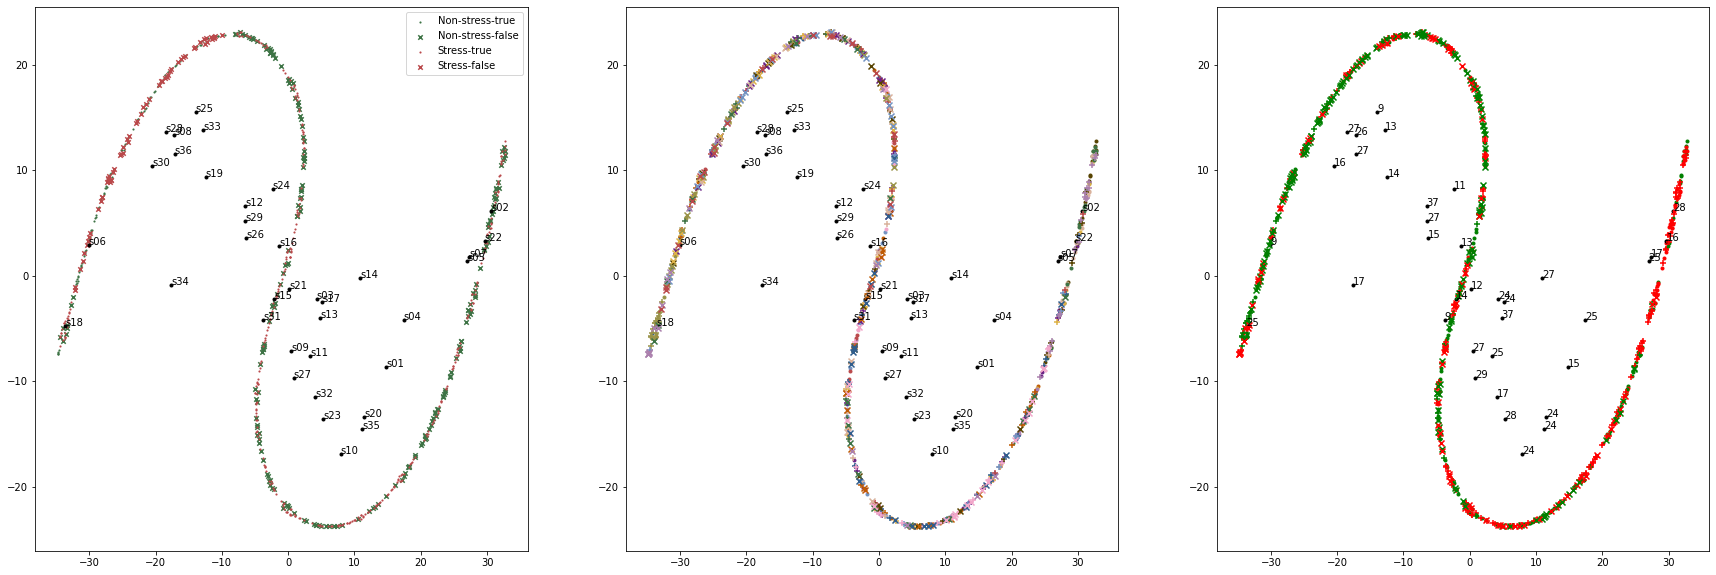

========== 2 ==========
['beta_frontal' 'F3_Delta']
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.754 0.749 0.029
LR: 0.678 0.679 0.033
Boost: 0.85 0.738 0.036
Ada: 0.753 0.703 0.062
RF: 1.0 0.735 0.038
LDA: 0.678 0.674 0.035


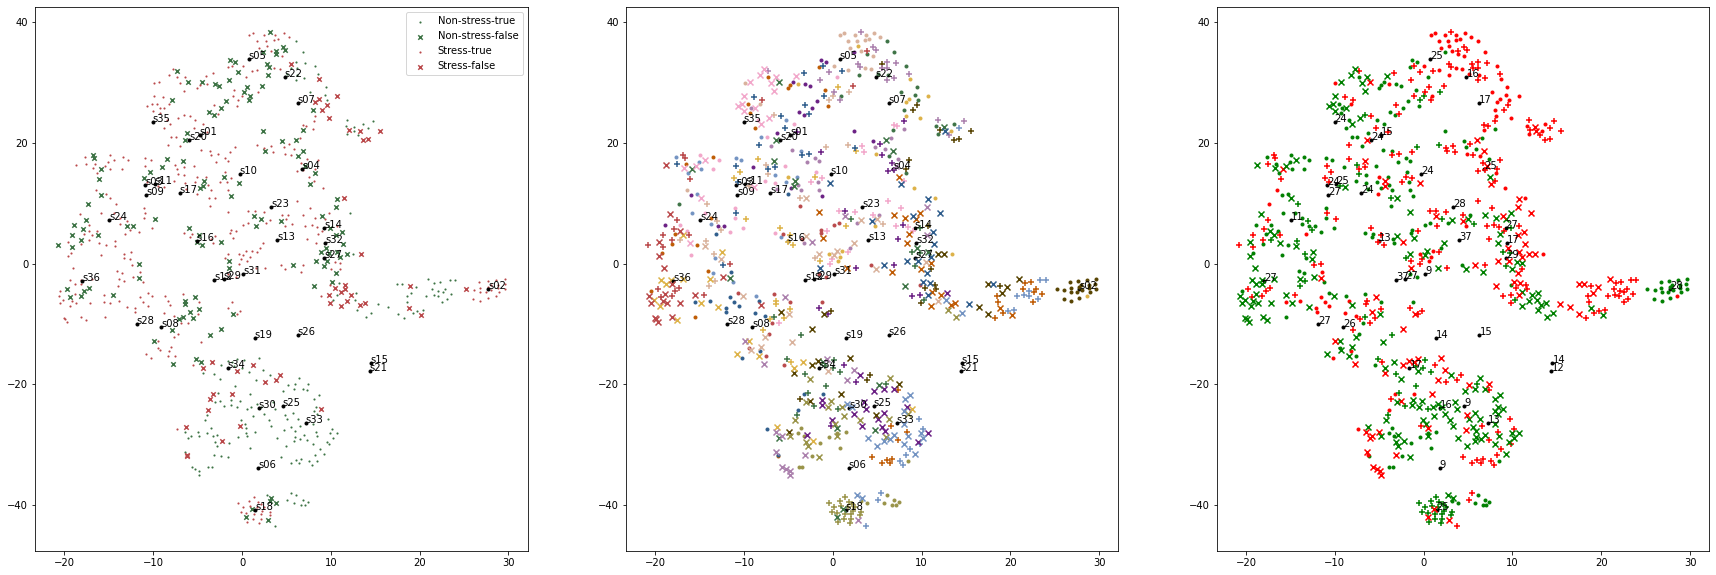

========== 3 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta']
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.782 0.767 0.045
LR: 0.667 0.668 0.029
Boost: 0.893 0.751 0.036
Ada: 0.779 0.728 0.057
RF: 1.0 0.771 0.042
LDA: 0.669 0.662 0.028


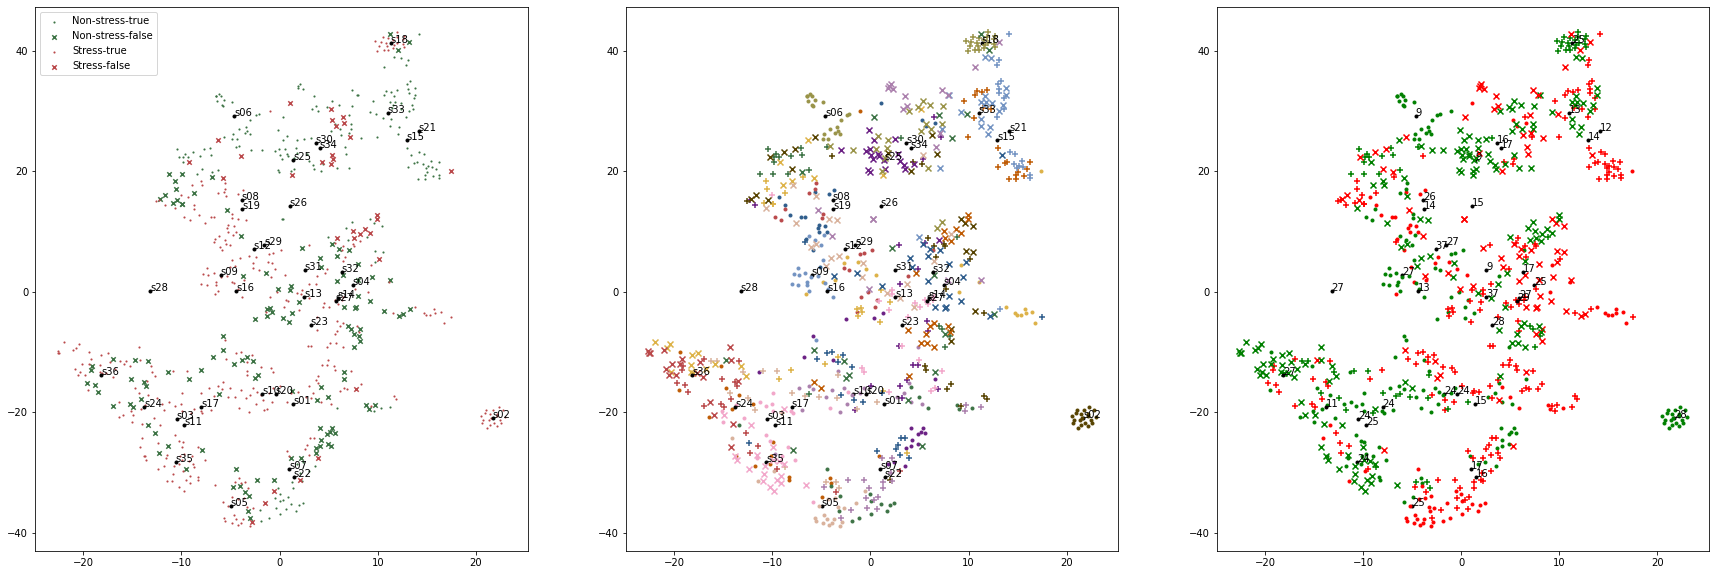

========== 4 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta']
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.847 0.825 0.043
LR: 0.681 0.678 0.071
Boost: 0.936 0.825 0.029
Ada: 0.84 0.761 0.044
RF: 1.0 0.833 0.059
LDA: 0.681 0.678 0.044


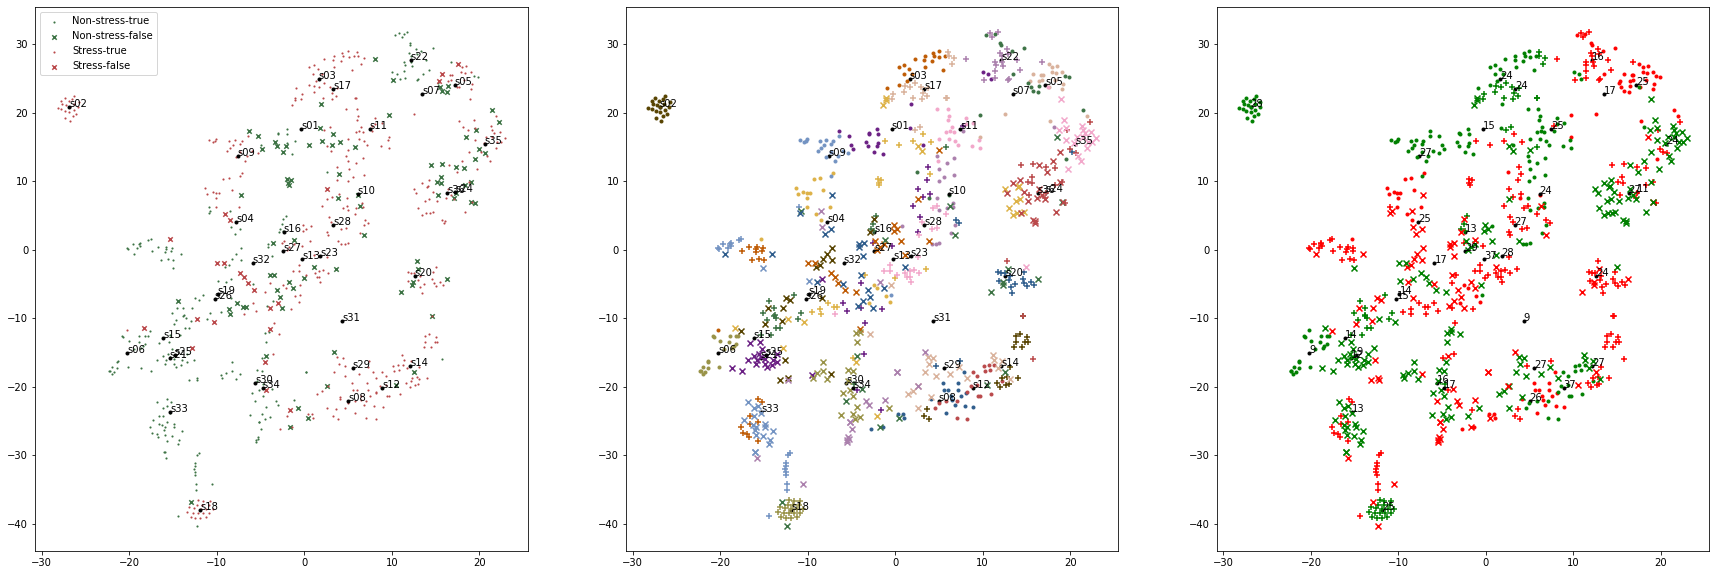

========== 5 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta']
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.889 0.872 0.044
LR: 0.731 0.731 0.051
Boost: 0.951 0.862 0.043
Ada: 0.876 0.806 0.05
RF: 1.0 0.881 0.026
LDA: 0.731 0.726 0.028


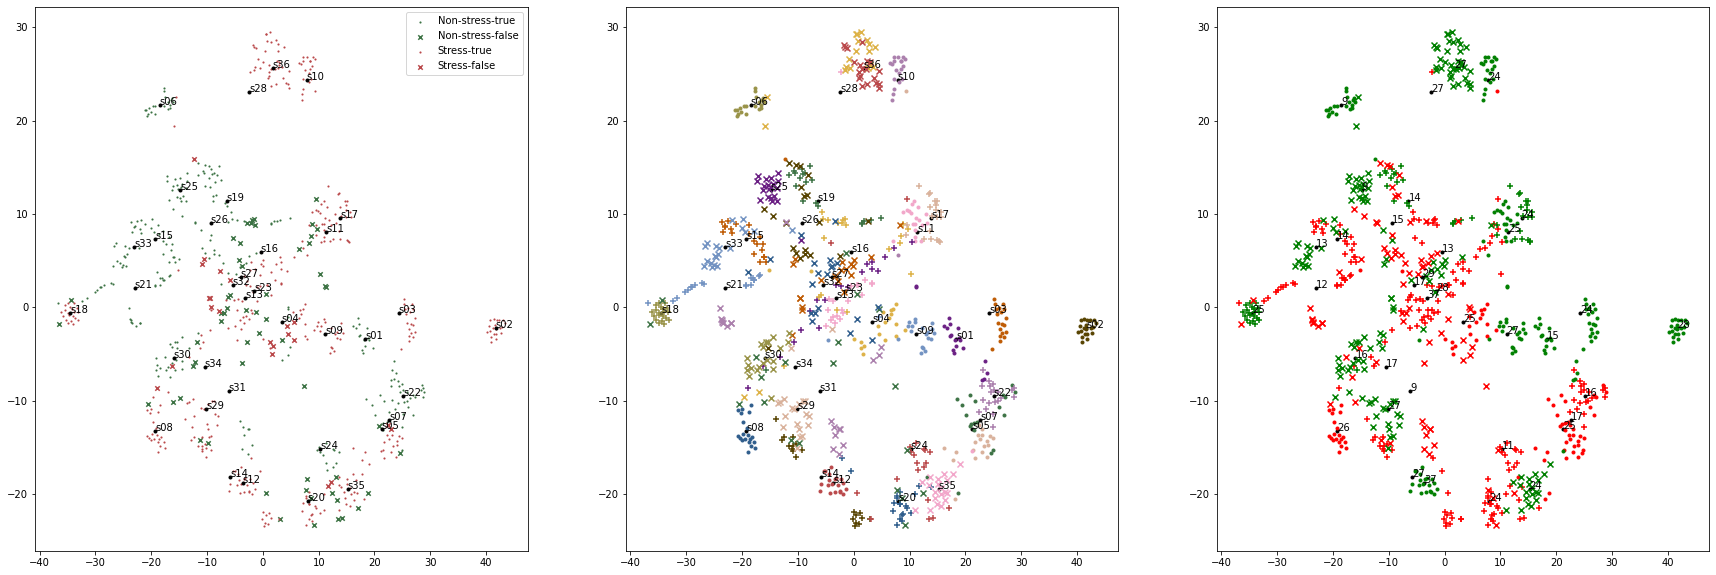

========== 6 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma']
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.89 0.869 0.022
LR: 0.728 0.725 0.056
Boost: 0.962 0.867 0.033
Ada: 0.886 0.812 0.046
RF: 1.0 0.879 0.044
LDA: 0.726 0.722 0.033


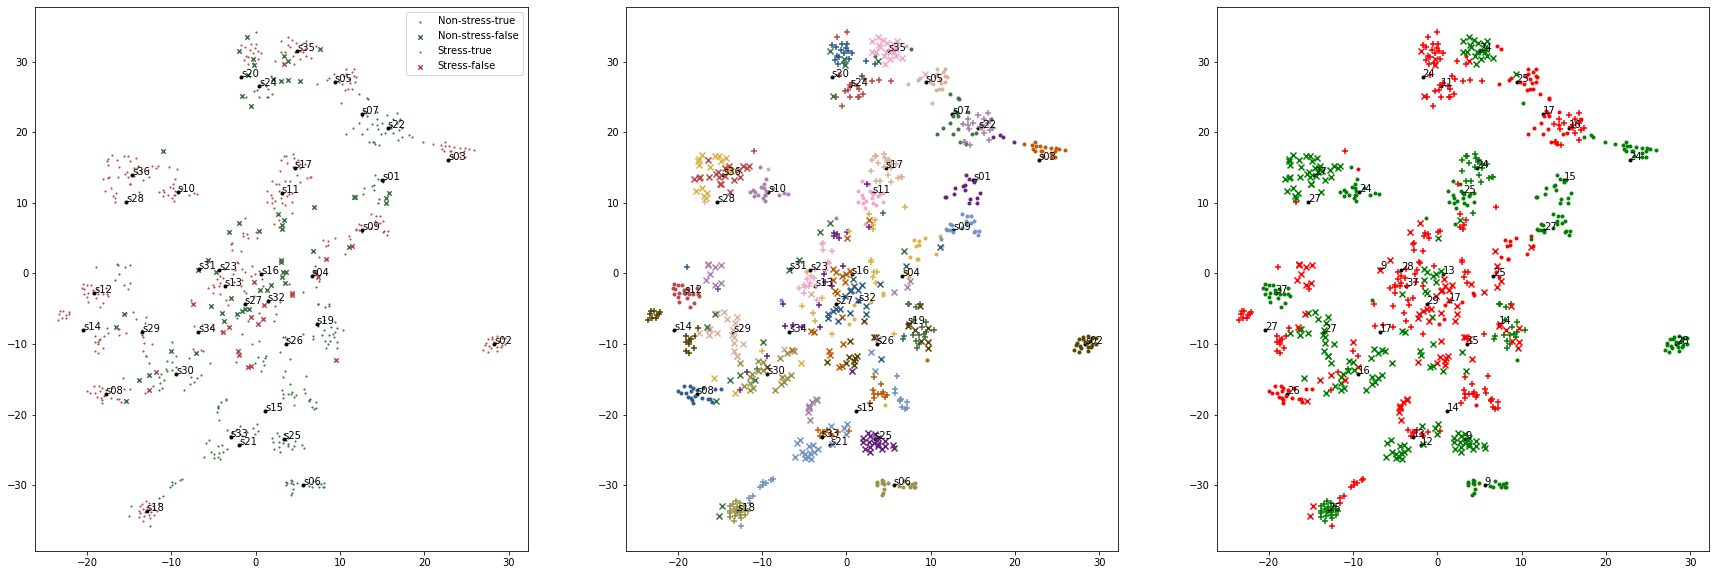

========== 7 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta']
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.906 0.885 0.014
LR: 0.728 0.728 0.057
Boost: 0.972 0.879 0.023
Ada: 0.901 0.817 0.05
RF: 1.0 0.892 0.035
LDA: 0.728 0.725 0.047


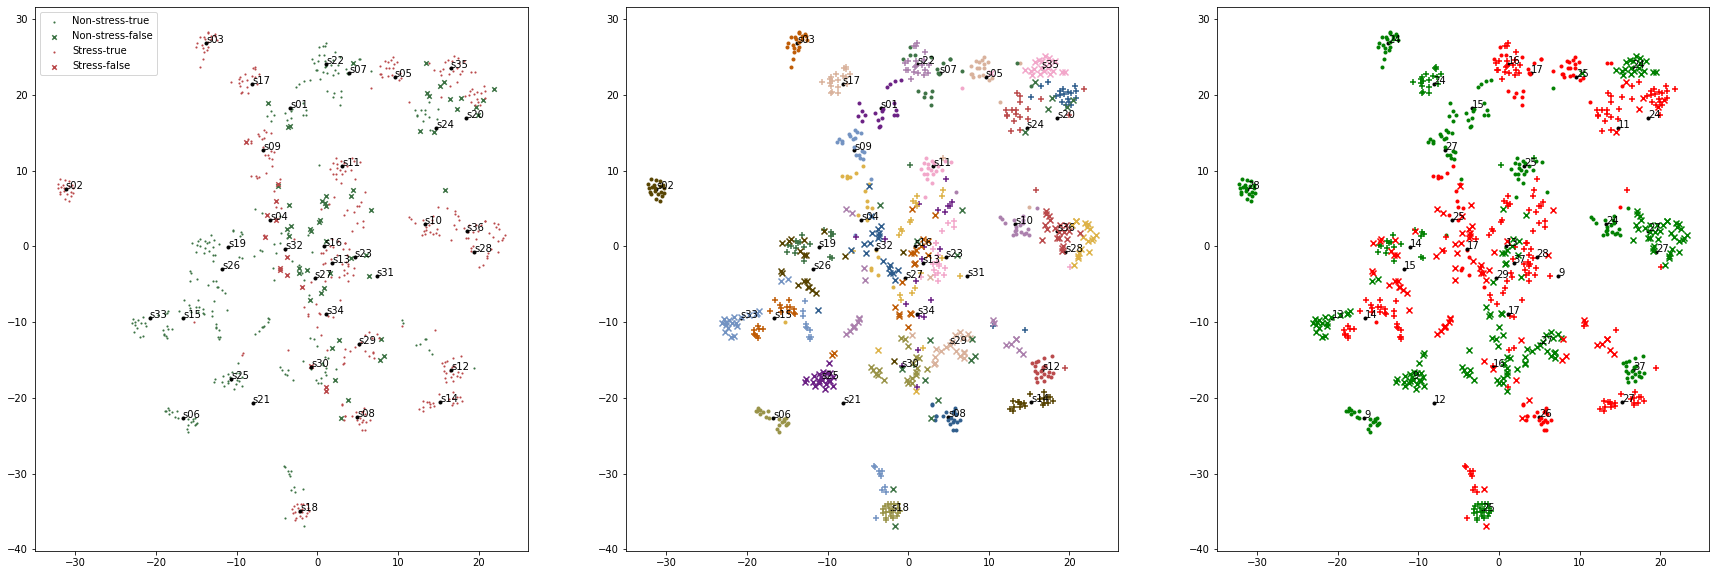

========== 8 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta']
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.938 0.917 0.032
LR: 0.768 0.761 0.038
Boost: 0.981 0.89 0.035
Ada: 0.922 0.856 0.046
RF: 1.0 0.907 0.04
LDA: 0.76 0.762 0.052


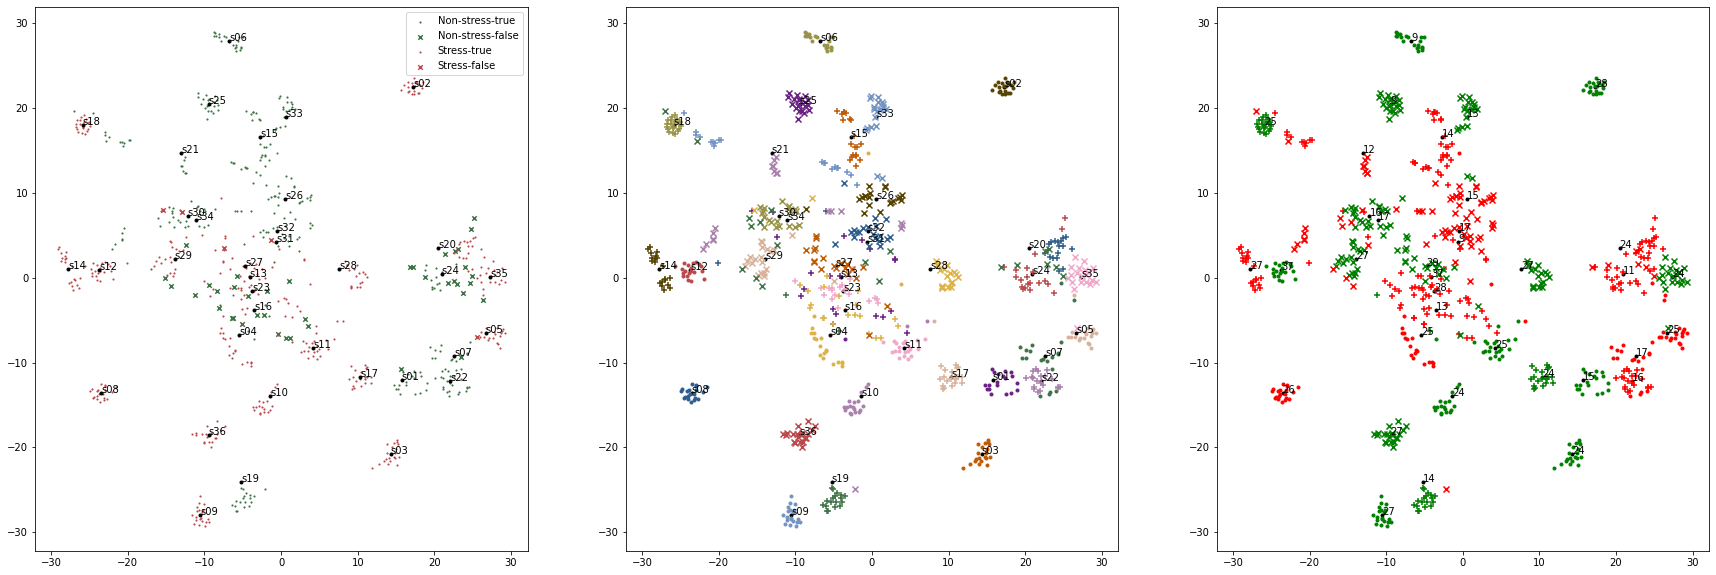

========== 9 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma']
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.939 0.919 0.034
LR: 0.767 0.758 0.063
Boost: 0.979 0.901 0.02
Ada: 0.921 0.86 0.042
RF: 1.0 0.906 0.028
LDA: 0.768 0.761 0.046


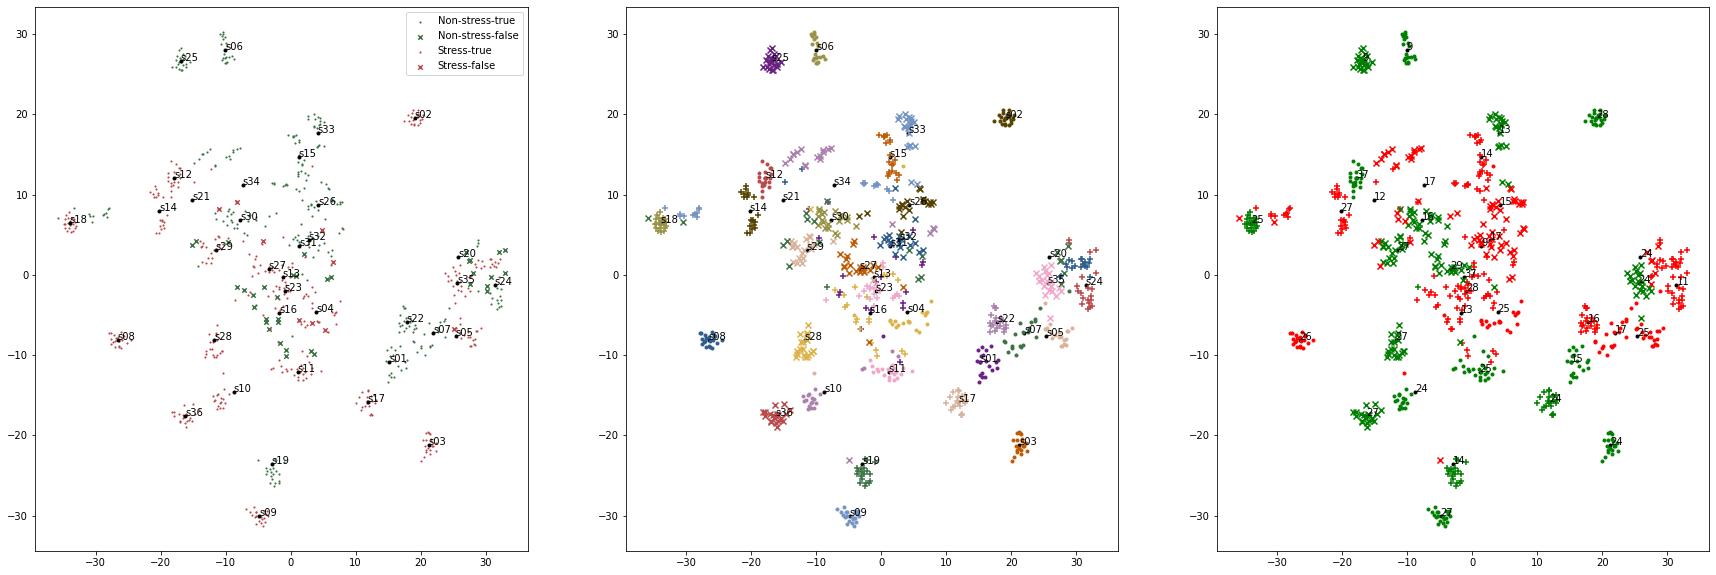

========== 10 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta']
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.949 0.928 0.027
LR: 0.783 0.765 0.055
Boost: 0.996 0.915 0.025
Ada: 0.946 0.875 0.027
RF: 1.0 0.924 0.028
LDA: 0.788 0.778 0.041


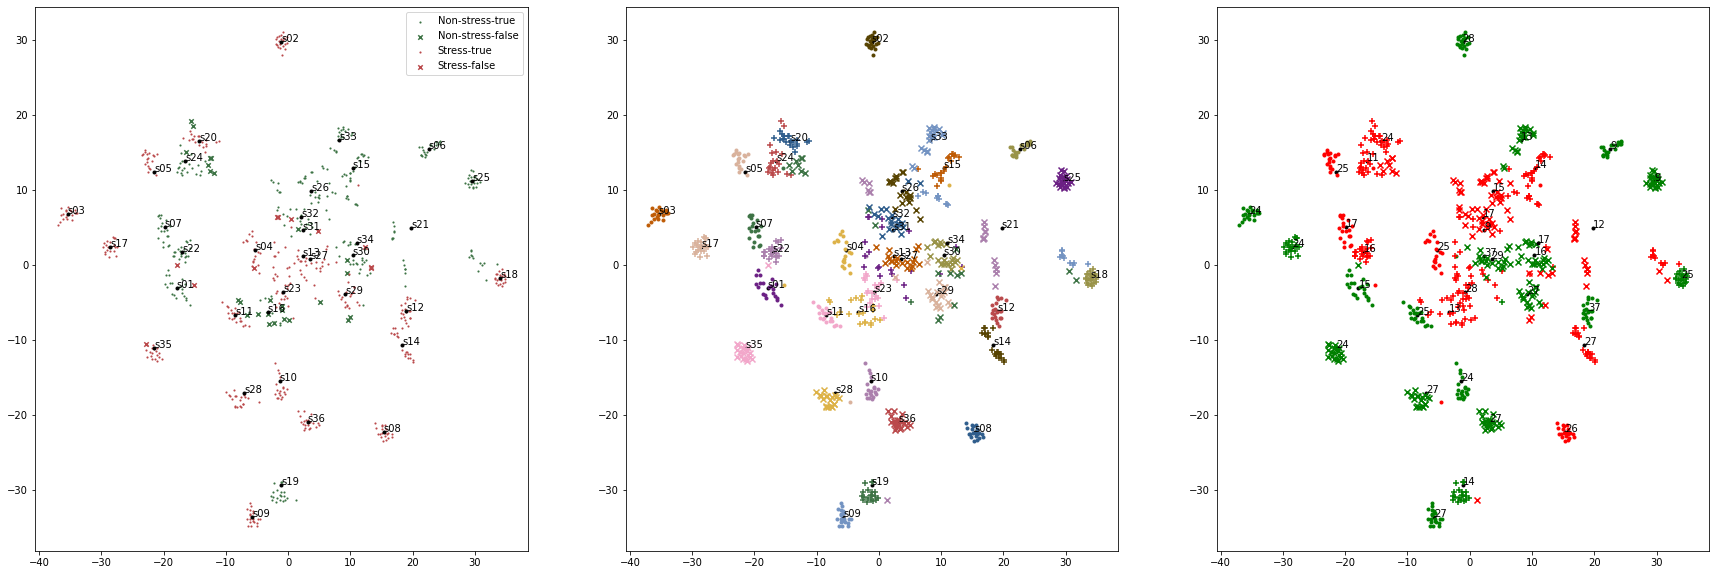

========== 11 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta']
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.953 0.932 0.018
LR: 0.801 0.783 0.047
Boost: 0.997 0.921 0.035
Ada: 0.942 0.861 0.038
RF: 1.0 0.931 0.018
LDA: 0.804 0.799 0.039


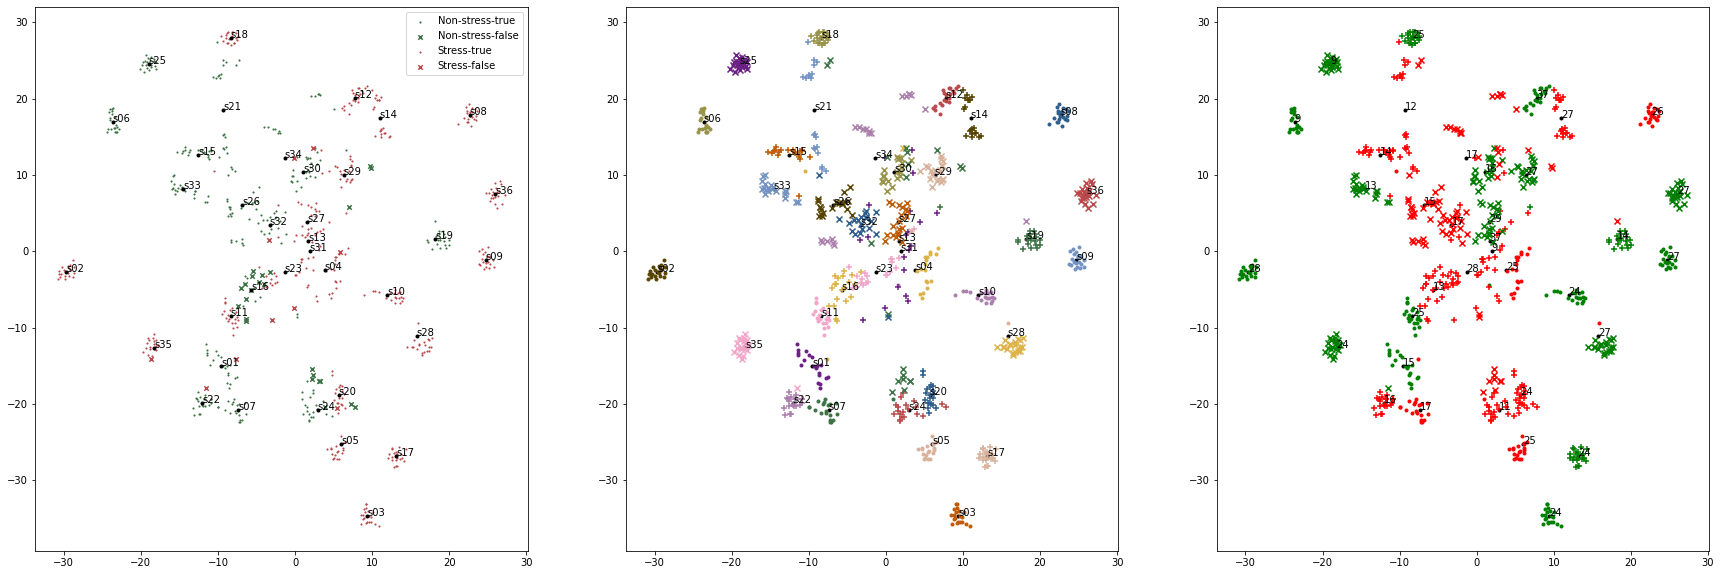

========== 12 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha']
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.95 0.933 0.032
LR: 0.796 0.788 0.042
Boost: 0.997 0.928 0.022
Ada: 0.943 0.876 0.033
RF: 1.0 0.938 0.017
LDA: 0.8 0.796 0.022


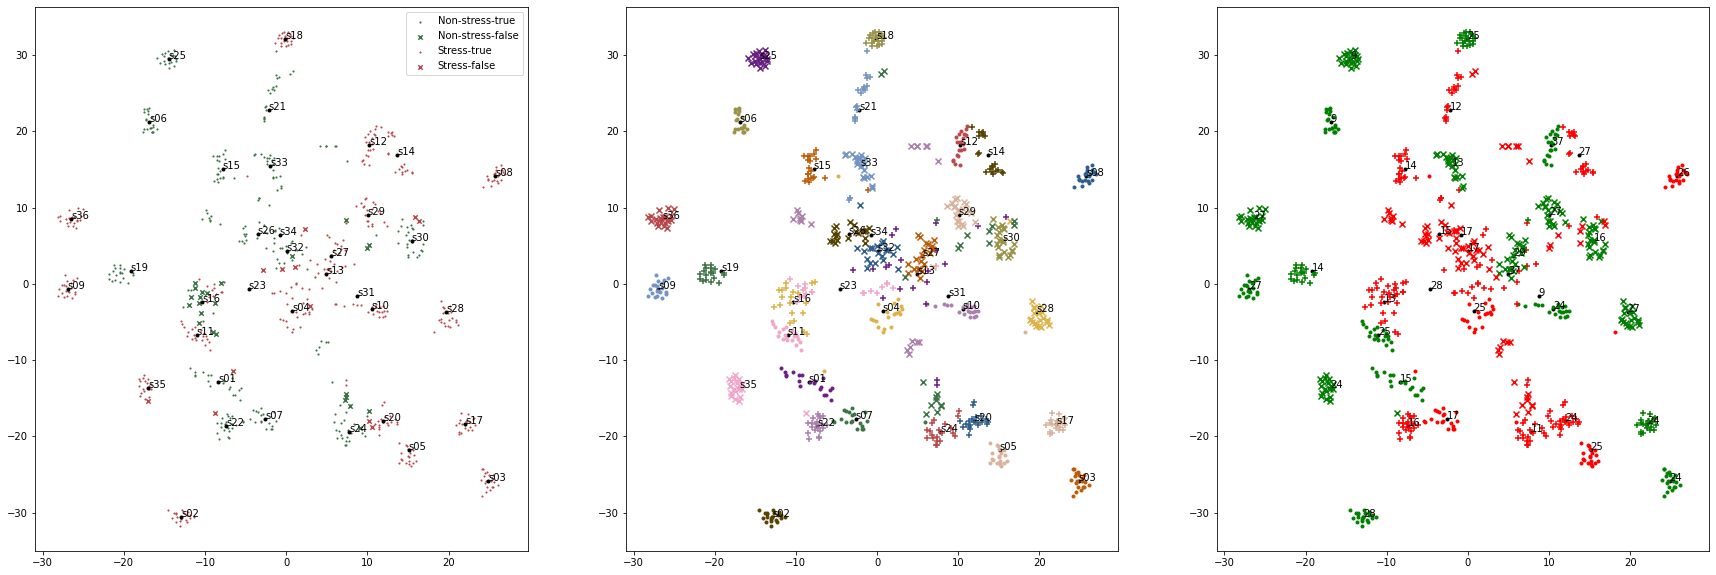

========== 13 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha']
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.957 0.942 0.023
LR: 0.801 0.789 0.042
Boost: 0.997 0.928 0.033
Ada: 0.951 0.897 0.029
RF: 1.0 0.943 0.035
LDA: 0.8 0.797 0.037


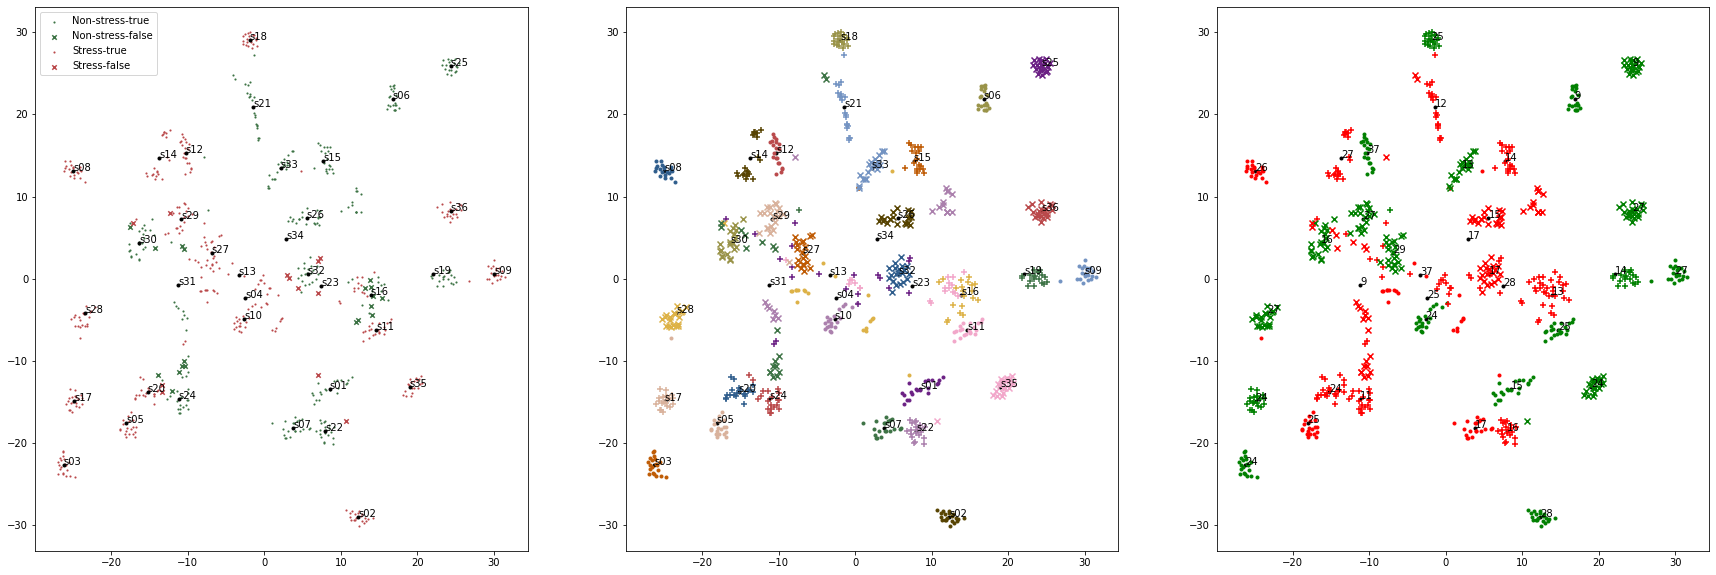

========== 14 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha']
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.974 0.951 0.032
LR: 0.794 0.781 0.042
Boost: 1.0 0.947 0.023
Ada: 0.972 0.886 0.043
RF: 1.0 0.95 0.022
LDA: 0.797 0.79 0.029


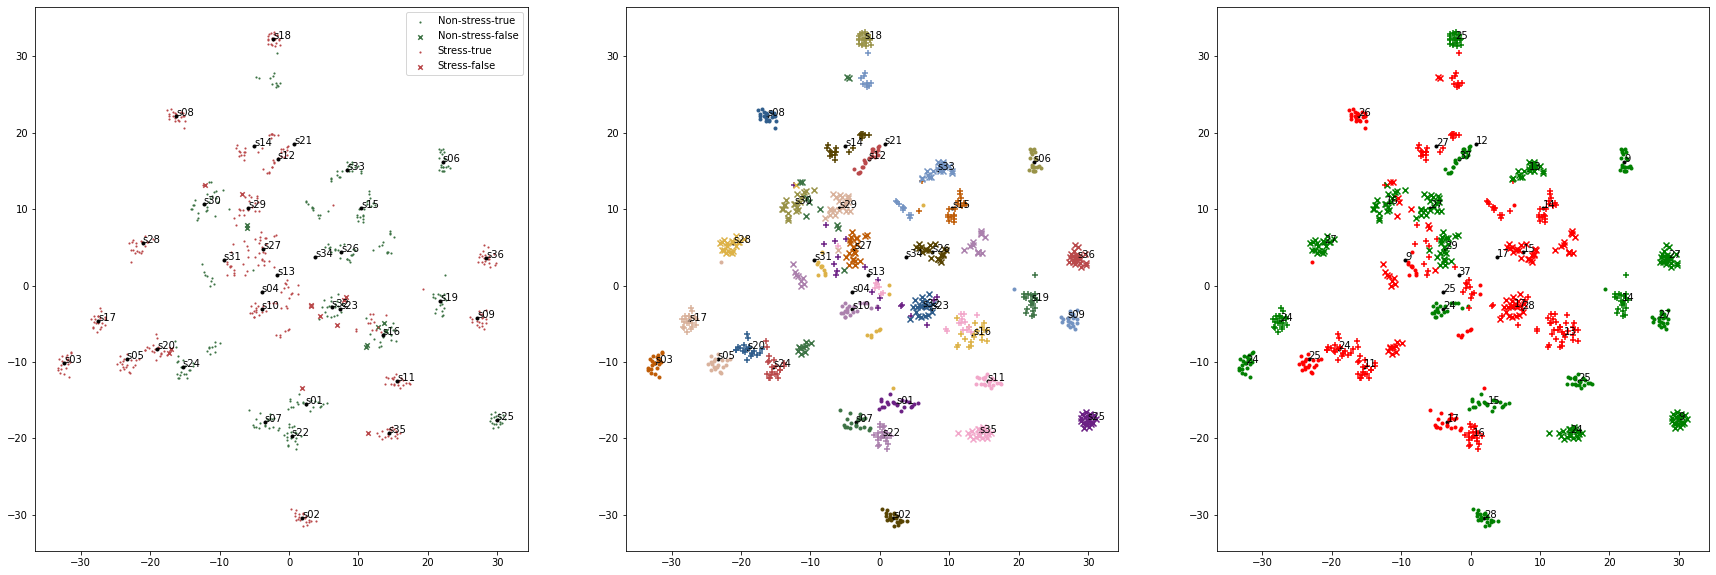

========== 15 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta']
X_ori.shape=(720, 15) y_ori.shape=(720,)
SVM: 0.975 0.96 0.018
LR: 0.794 0.786 0.029
Boost: 0.999 0.936 0.04
Ada: 0.976 0.885 0.044
RF: 1.0 0.95 0.024
LDA: 0.792 0.778 0.026


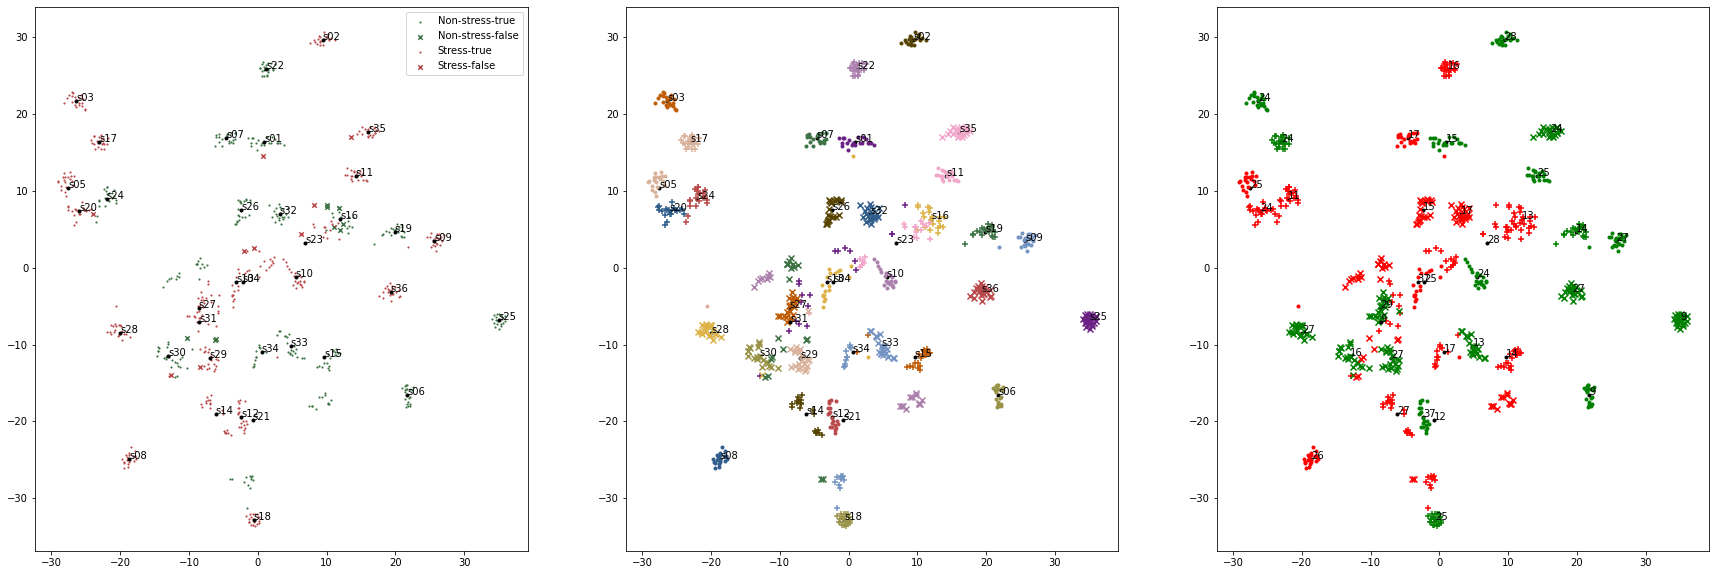

========== 16 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta']
X_ori.shape=(720, 16) y_ori.shape=(720,)
SVM: 0.986 0.975 0.01
LR: 0.826 0.819 0.03
Boost: 0.999 0.962 0.022
Ada: 0.986 0.914 0.025
RF: 1.0 0.969 0.017
LDA: 0.825 0.81 0.038


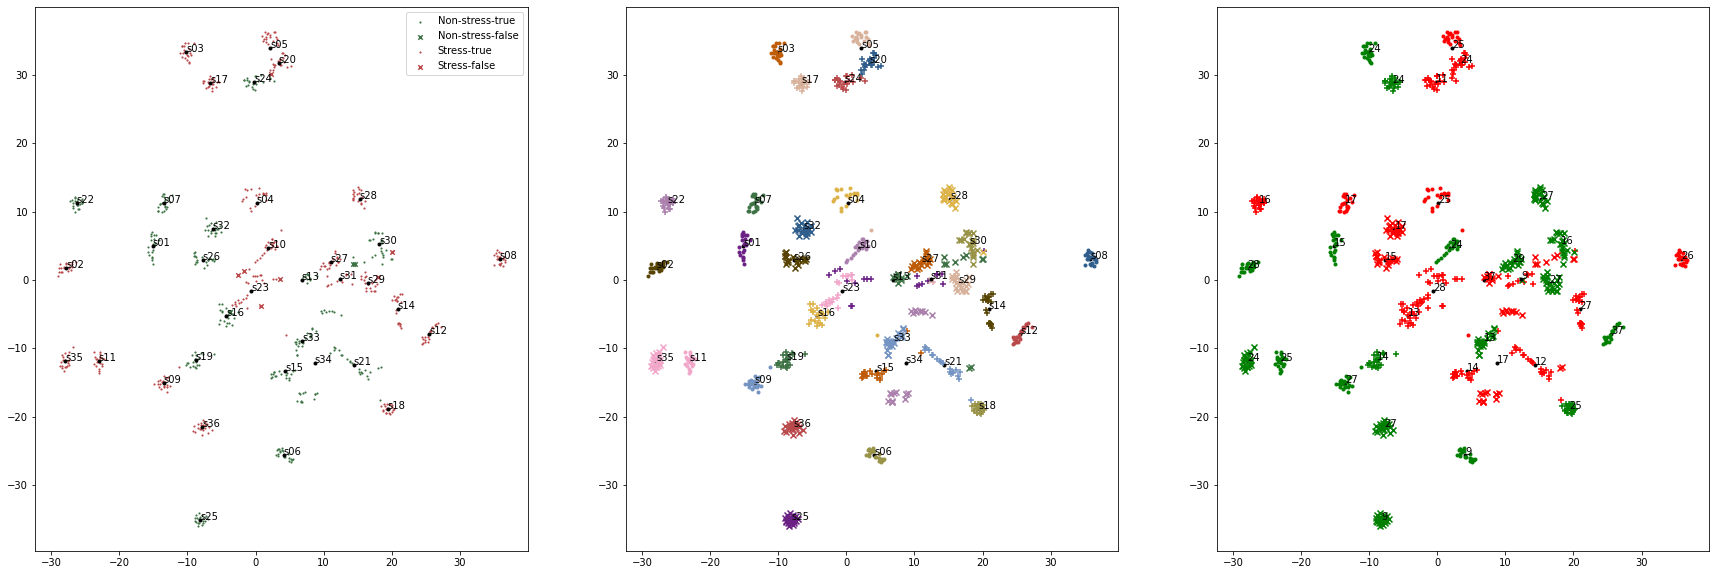

========== 17 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha']
X_ori.shape=(720, 17) y_ori.shape=(720,)
SVM: 0.983 0.974 0.02
LR: 0.824 0.818 0.045
Boost: 0.999 0.953 0.029
Ada: 0.986 0.924 0.032
RF: 1.0 0.975 0.017
LDA: 0.825 0.817 0.051


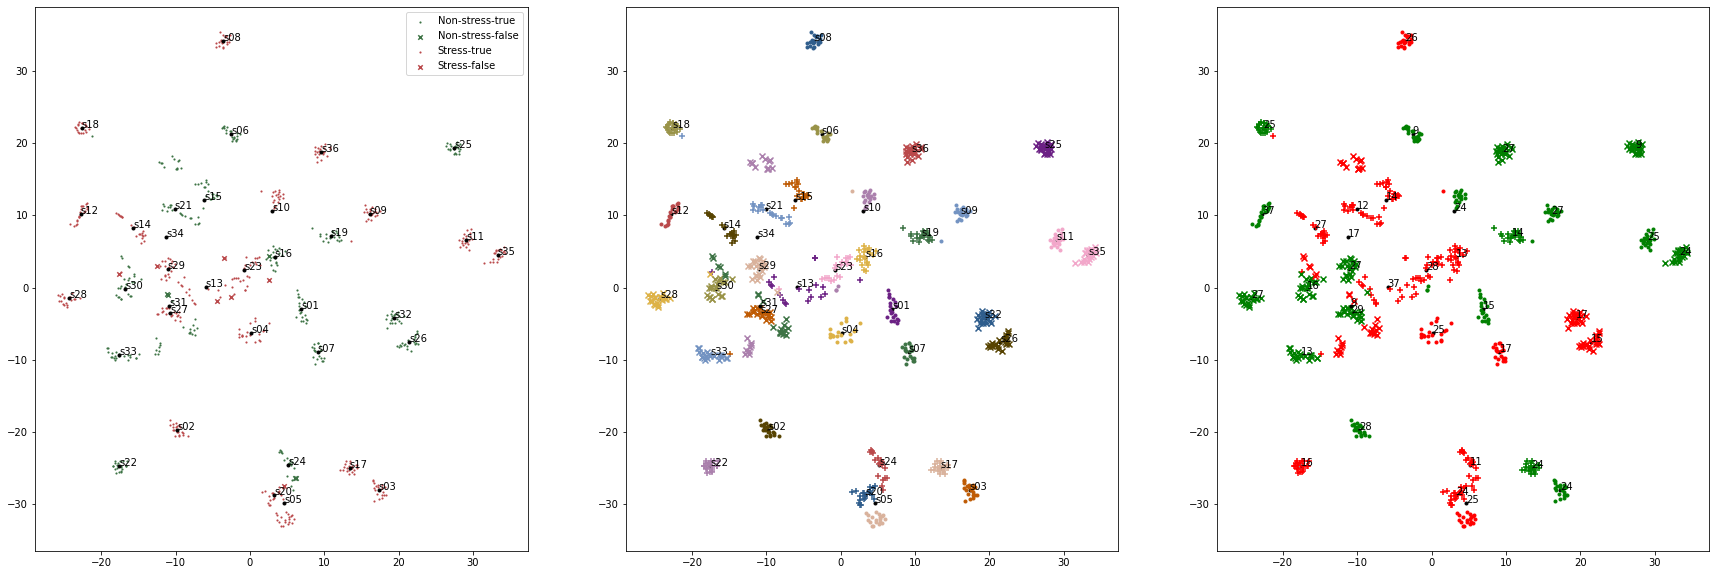

========== 18 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta']
X_ori.shape=(720, 18) y_ori.shape=(720,)
SVM: 0.983 0.974 0.016
LR: 0.825 0.811 0.032
Boost: 0.999 0.953 0.024
Ada: 0.978 0.915 0.031
RF: 1.0 0.972 0.024
LDA: 0.824 0.819 0.042


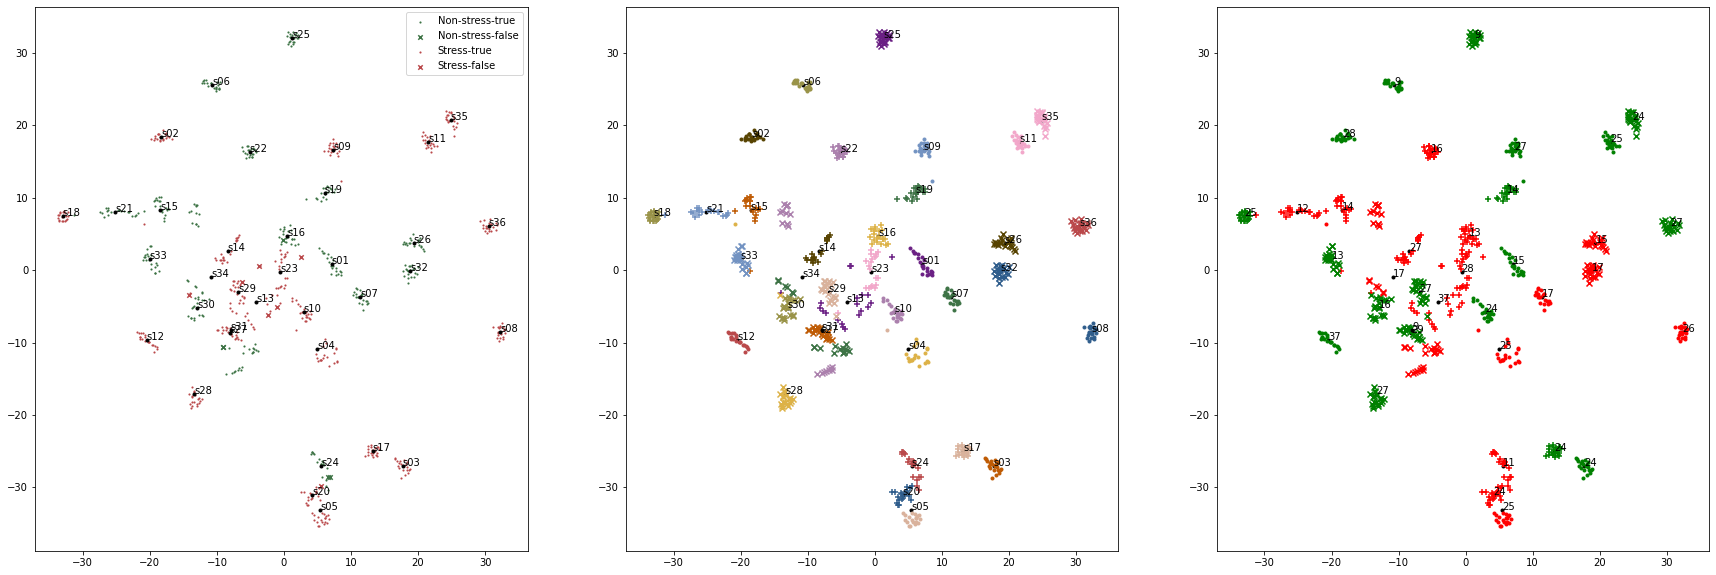

========== 19 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma']
X_ori.shape=(720, 19) y_ori.shape=(720,)
SVM: 0.986 0.975 0.016
LR: 0.828 0.81 0.056
Boost: 0.999 0.958 0.026
Ada: 0.981 0.915 0.036
RF: 1.0 0.965 0.023
LDA: 0.818 0.811 0.045


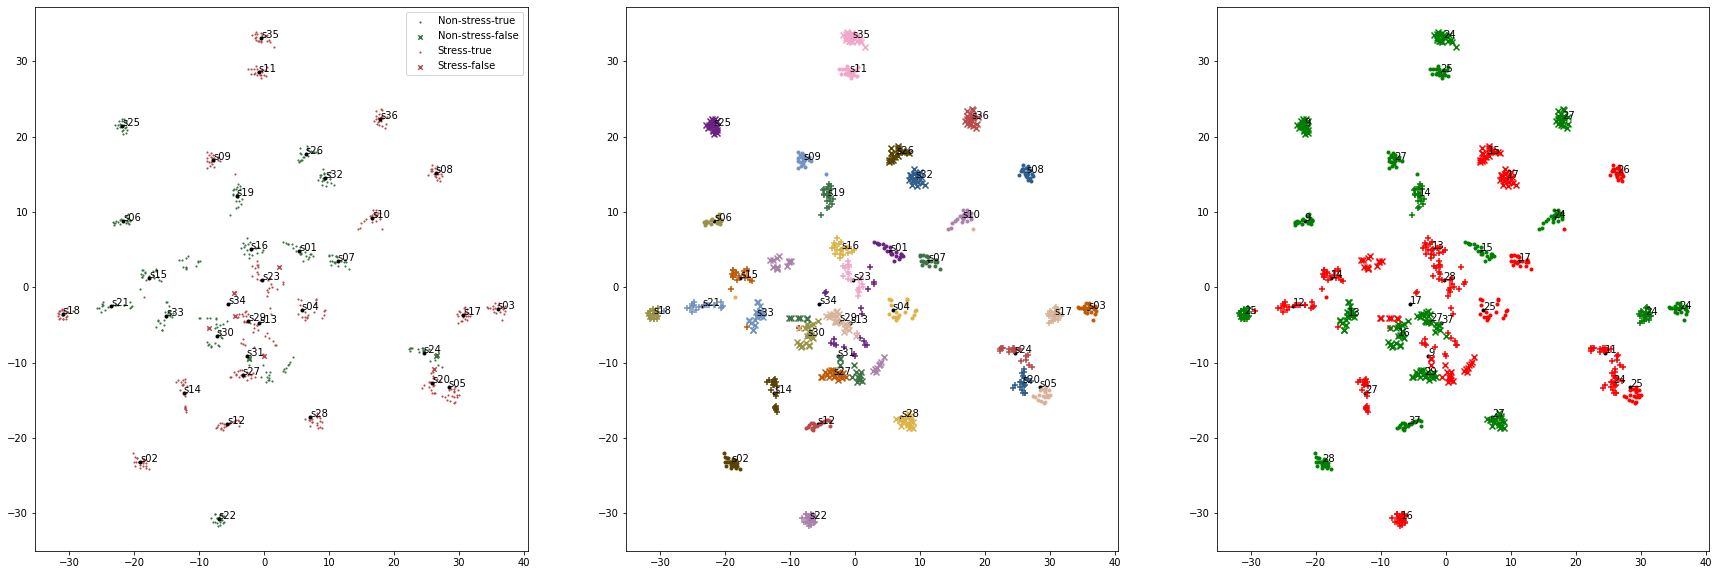

========== 20 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma' 'T6_Alpha']
X_ori.shape=(720, 20) y_ori.shape=(720,)
SVM: 0.988 0.978 0.021
LR: 0.843 0.821 0.035
Boost: 1.0 0.949 0.028
Ada: 0.976 0.914 0.032
RF: 1.0 0.979 0.017
LDA: 0.829 0.815 0.026


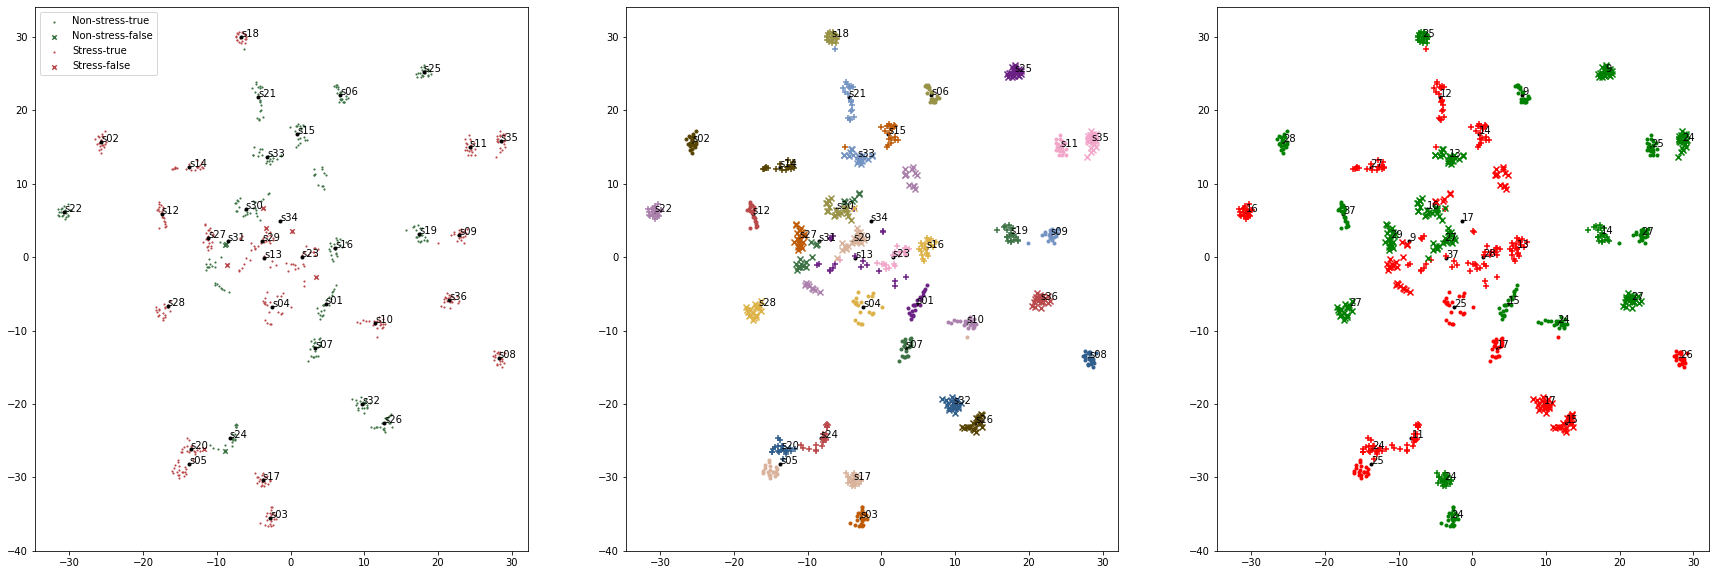

========== 21 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma' 'T6_Alpha' 'Fp1_Delta']
X_ori.shape=(720, 21) y_ori.shape=(720,)
SVM: 0.989 0.975 0.014
LR: 0.846 0.829 0.046
Boost: 1.0 0.962 0.02
Ada: 0.978 0.903 0.028
RF: 1.0 0.972 0.019
LDA: 0.838 0.822 0.021


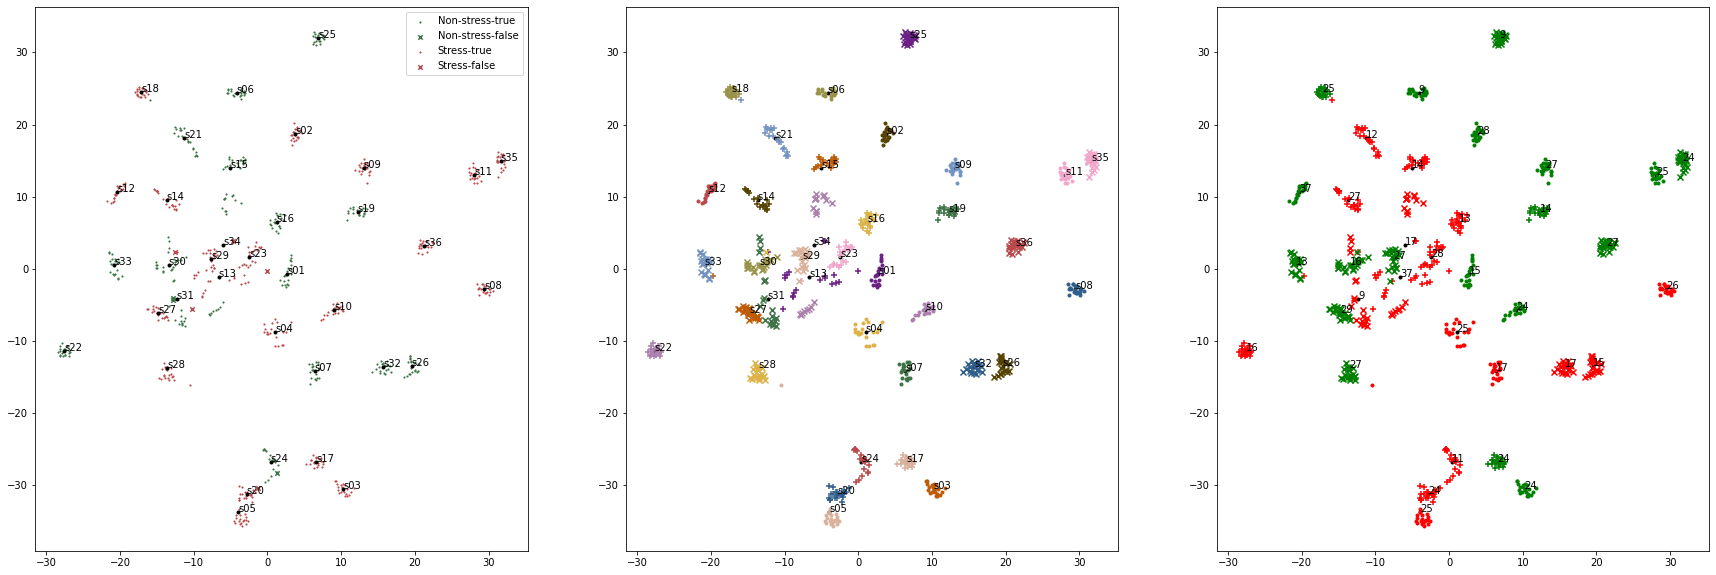

========== 22 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma' 'T6_Alpha' 'Fp1_Delta' 'F3_Slow']
X_ori.shape=(720, 22) y_ori.shape=(720,)
SVM: 0.988 0.981 0.011
LR: 0.843 0.828 0.034
Boost: 1.0 0.956 0.018
Ada: 0.979 0.918 0.026
RF: 1.0 0.976 0.014
LDA: 0.839 0.826 0.033


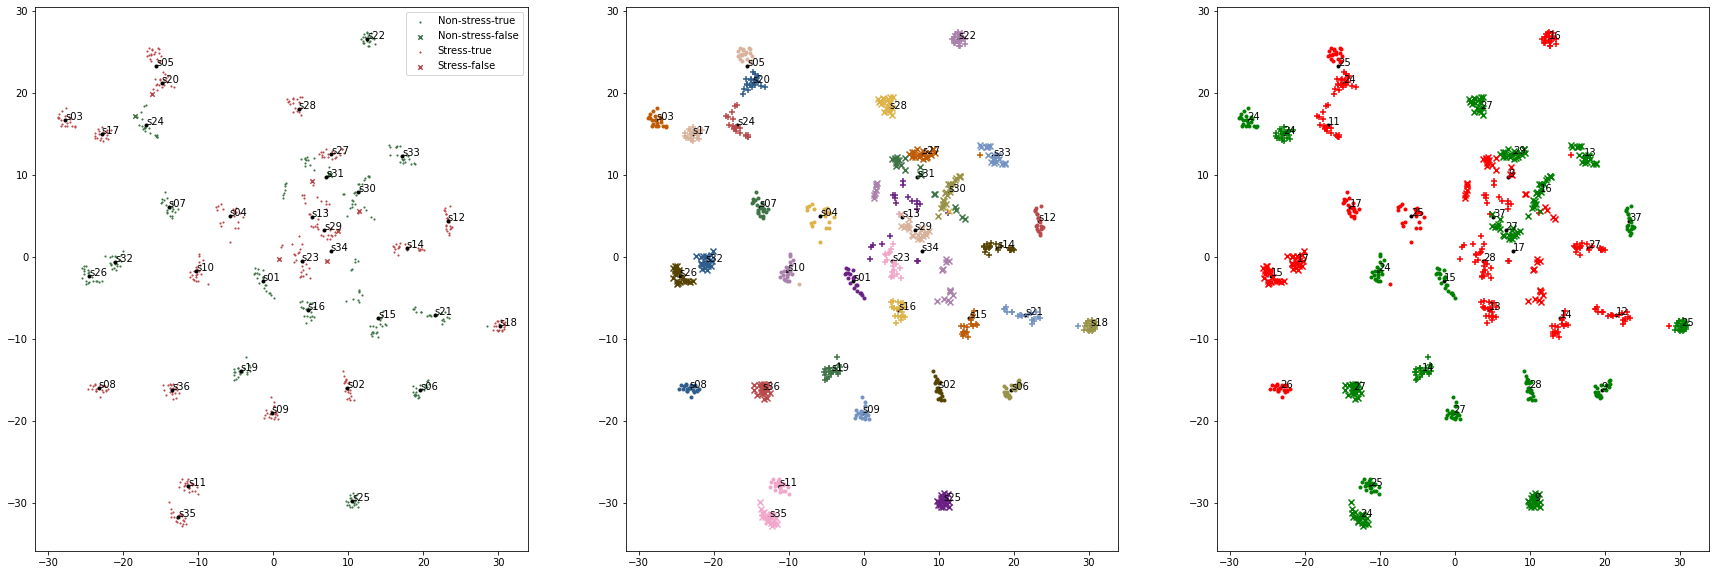

========== 23 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma' 'T6_Alpha' 'Fp1_Delta' 'F3_Slow' 'alpha_frontal']
X_ori.shape=(720, 23) y_ori.shape=(720,)
SVM: 0.986 0.976 0.016
LR: 0.849 0.829 0.043
Boost: 1.0 0.96 0.015
Ada: 0.979 0.906 0.036
RF: 1.0 0.979 0.014
LDA: 0.843 0.831 0.033


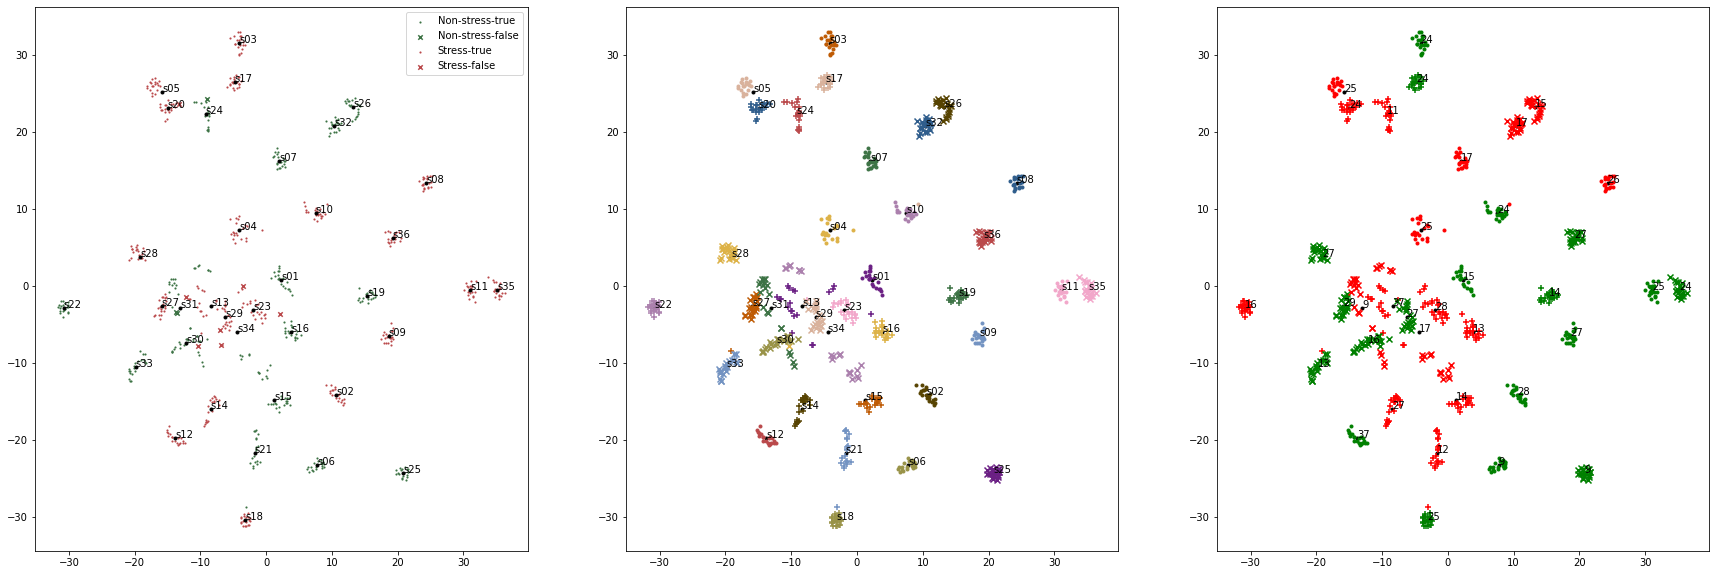

========== 24 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma' 'T6_Alpha' 'Fp1_Delta' 'F3_Slow' 'alpha_frontal'
 'alpha_asymmetry']
X_ori.shape=(720, 24) y_ori.shape=(720,)
SVM: 0.986 0.972 0.012
LR: 0.849 0.838 0.032
Boost: 1.0 0.956 0.029
Ada: 0.989 0.917 0.021
RF: 1.0 0.976 0.015
LDA: 0.843 0.826 0.039


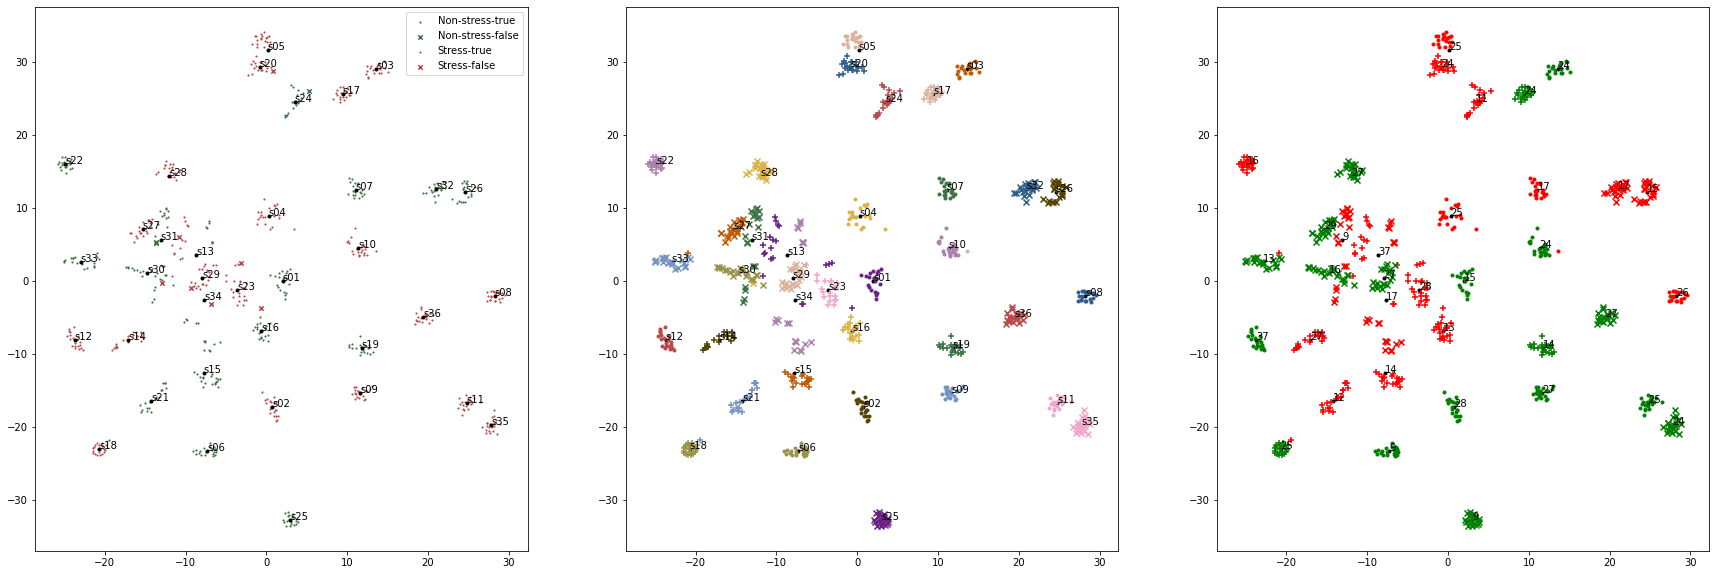

========== 25 ==========
['beta_frontal' 'F3_Delta' 'F4_Delta' 'F3_Beta' 'P4_Delta' 'F3_Gamma'
 'P4_Theta' 'C3_Theta' 'C3_relative_gamma' 'T4_Theta' 'T4_Low_beta'
 'P4_Alpha' 'F7_Alpha' 'F3_Alpha' 'F3_Theta' 'C3_Delta' 'F4_Alpha'
 'F3_Low_beta' 'T3_Gamma' 'T6_Alpha' 'Fp1_Delta' 'F3_Slow' 'alpha_frontal'
 'alpha_asymmetry' 'alpha_temporal']
X_ori.shape=(720, 25) y_ori.shape=(720,)
SVM: 0.988 0.976 0.026
LR: 0.861 0.853 0.037
Boost: 1.0 0.962 0.016
Ada: 0.99 0.922 0.029
RF: 1.0 0.972 0.02
LDA: 0.846 0.832 0.021


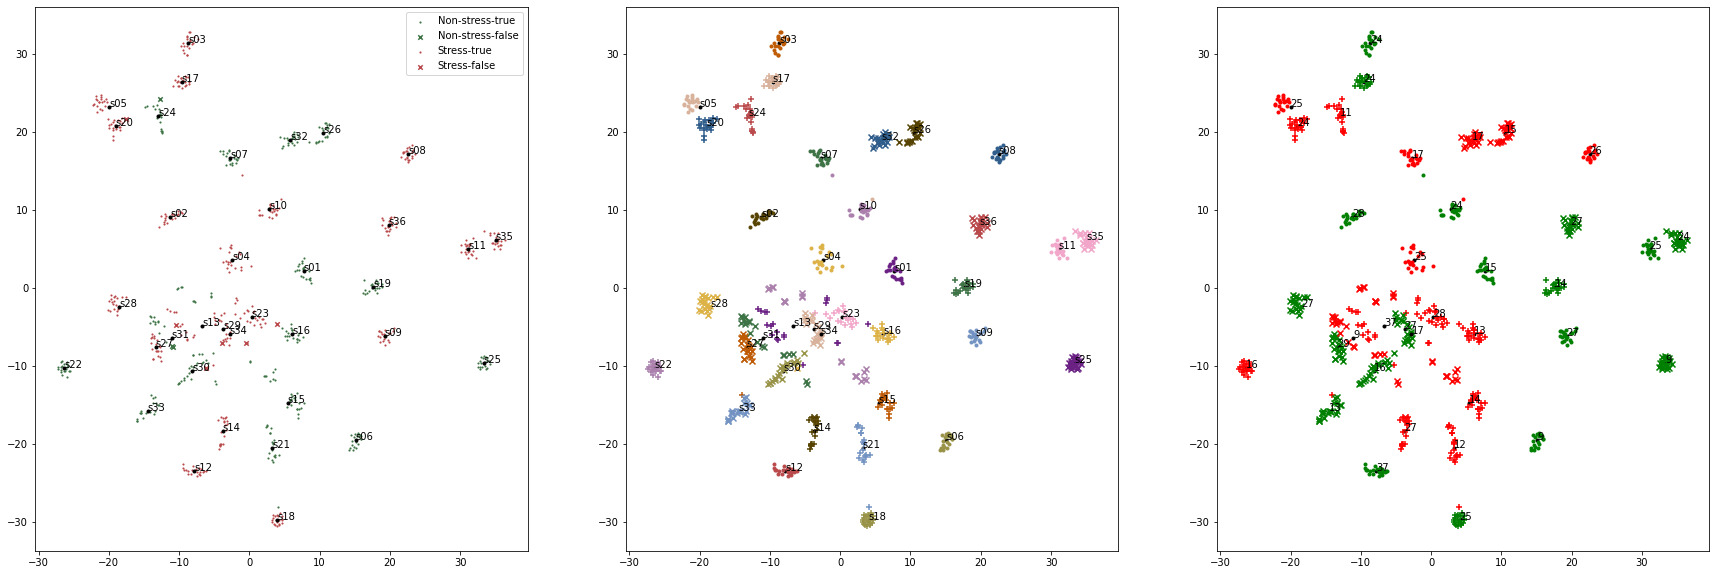

In [25]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
rank = rank_ensemble
for i in range(1,25+1):
    print("="*10,i,"="*10)
    print(features[rank[:i]])
    X,y = getXY(csv.copy(), features=features[:i])
    model = train_pipe(X,y)

    plot_TSNE(model=model,X_ori=X,y_ori=y)
    # break